## Jon Bellion Over The *Wonder* Years: A Comparative Analysis of Jon Bellion's Albums

This is a Python project intended to explore, analyze and compare Jon Bellion's albums. Jon Bellion's collection of songs, 3 EPs and 2 studio albums, are for the purpose of this analysis all grouped as albums. The data for this project will be scraped from Spotify with Spotipy, which is a lightweight Python library for the Spotify Web API.

In [13]:
!pip3 install spotipy

In [9]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

#use client keys here
client_id = 'CLIENT_ID'
client_secret = 'CLIENT_SECRET'

client_credentials_manager = SpotifyClientCredentials(client_id= client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [15]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

#use client keys here
client_id = 'CLIENT_ID'
client_secret = 'CLIENT_SECRET'

client_credentials_manager = SpotifyClientCredentials(client_id= client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
name = "{Jon Bellion}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/50JJSqHUf2RQ9xsHs0KMHg'},
  'href': 'https://api.spotify.com/v1/artists/50JJSqHUf2RQ9xsHs0KMHg',
  'id': '50JJSqHUf2RQ9xsHs0KMHg',
  'name': 'Jon Bellion',
  'type': 'artist',
  'uri': 'spotify:artist:50JJSqHUf2RQ9xsHs0KMHg'}]

In [12]:
#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
album_release_dates = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:59YYObx9wFEFG5zVdlfwvf',
 'spotify:album:2e8nzTZ0HtK94IifOWgN7o',
 'spotify:album:7EOvtHDxbltA0GNC4mvLAC',
 'spotify:album:0Qfwzu4yfzVUIrBLittdDO',
 'spotify:album:0aRIVhGZ5l7pmaBF38fgby']

In [16]:
spotify_albums = {}
spotify_albums["album"] = {}

In [17]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
#Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])  

In [19]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album Glory Sound Prep songs has been added to spotify_albums dictionary
Album The Human Condition songs has been added to spotify_albums dictionary
Album The Definition songs has been added to spotify_albums dictionary
Album The Separation songs has been added to spotify_albums dictionary
Album Translations Through Speakers songs has been added to spotify_albums dictionary


In [20]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['duration_ms'] = []
    spotify_albums[album]['popularity'] = []
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['key'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['mode'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['duration_ms'].append(features[0]['duration_ms'])
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['key'].append(features[0]['key'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['mode'].append(features[0]['mode'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        
        track_count+=1

In [22]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 83.59185600280762 seconds


In [23]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['duration_ms'] = []
dic_df['popularity'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['key'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['mode'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])


57

In [24]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.DataFrame.from_dict(dic_df)
df

,album,track_number,id,name,uri,duration_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Glory Sound Prep,1,1EAZ0APxPiVuzDb7R5TfVI,Conversations with my Wife,spotify:track:1EAZ0APxPiVuzDb7R5TfVI,206210,54,0.02220,0.496,0.487,0.000018,6,0.6380,-7.003,1,0.0301,138.187,0.321
1,Glory Sound Prep,2,1eftOUoeMO1JkSQQmS6jXF,JT,spotify:track:1eftOUoeMO1JkSQQmS6jXF,268466,50,0.01680,0.518,0.587,0.000001,0,0.2060,-7.937,1,0.1200,98.367,0.631
2,Glory Sound Prep,3,2X1Tygc4uVunRgzNkFb1mG,"Let's Begin (feat. Roc Marciano, RZA, B.Keyz &...",spotify:track:2X1Tygc4uVunRgzNkFb1mG,340522,44,0.29000,0.647,0.749,0.000001,4,0.1260,-5.056,0,0.4200,91.902,0.585
3,Glory Sound Prep,4,7cK7hDrE7vAesPf8xd5zmb,Stupid Deep,spotify:track:7cK7hDrE7vAesPf8xd5zmb,178176,59,0.73200,0.362,0.377,0.000631,2,0.1270,-9.713,1,0.0339,137.891,0.294
4,Glory Sound Prep,5,359Q4gGdrQIFhRzs7J8gZu,The Internet,spotify:track:359Q4gGdrQIFhRzs7J8gZu,189492,49,0.10600,0.767,0.792,0.000010,5,0.1450,-5.053,0,0.2250,119.168,0.699
5,Glory Sound Prep,6,4FUDWkguOUVpLRAVn5C20z,Blu,spotify:track:4FUDWkguOUVpLRAVn5C20z,183344,60,0.29000,0.384,0.465,0.000022,0,0.3590,-8.554,1,0.0341,131.604,0.636
6,Glory Sound Prep,7,7HKSWfpxHhllSmoLk9AQz8,Adult Swim (feat. Tuamie),spotify:track:7HKSWfpxHhllSmoLk9AQz8,313897,47,0.24400,0.701,0.828,0.000000,7,0.4170,-5.606,1,0.2970,89.988,0.651
7,Glory Sound Prep,8,7pMS0byKI7V1Mpl0SlWEDq,Couples Retreat,spotify:track:7pMS0byKI7V1Mpl0SlWEDq,208697,45,0.01180,0.347,0.672,0.000154,7,0.2450,-6.661,1,0.5200,195.225,0.565
8,Glory Sound Prep,9,6BbANlpji0u8ZlqyPVMQiM,Cautionary Tales,spotify:track:6BbANlpji0u8ZlqyPVMQiM,227207,49,0.01220,0.582,0.550,0.000028,7,0.1280,-8.474,1,0.0448,94.087,0.696
9,Glory Sound Prep,10,1SefvAcZtoZo22njnX2qy7,Mah's Joint (feat. Quincy Jones),spotify:track:1SefvAcZtoZo22njnX2qy7,481590,44,0.31700,0.271,0.474,0.000489,0,0.0970,-9.718,1,0.0498,177.907,0.362


In [26]:
print(len(df))
final_df = df.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df))

57
57


In [27]:
final_df.head()

,album,track_number,id,name,uri,duration_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Glory Sound Prep,1,1EAZ0APxPiVuzDb7R5TfVI,Conversations with my Wife,spotify:track:1EAZ0APxPiVuzDb7R5TfVI,206210,54,0.0222,0.496,0.487,0.000018,6,0.638,-7.003,1,0.0301,138.187,0.321
1,Glory Sound Prep,2,1eftOUoeMO1JkSQQmS6jXF,JT,spotify:track:1eftOUoeMO1JkSQQmS6jXF,268466,50,0.0168,0.518,0.587,0.000001,0,0.206,-7.937,1,0.1200,98.367,0.631
2,Glory Sound Prep,3,2X1Tygc4uVunRgzNkFb1mG,"Let's Begin (feat. Roc Marciano, RZA, B.Keyz &...",spotify:track:2X1Tygc4uVunRgzNkFb1mG,340522,44,0.2900,0.647,0.749,0.000001,4,0.126,-5.056,0,0.4200,91.902,0.585
3,Glory Sound Prep,4,7cK7hDrE7vAesPf8xd5zmb,Stupid Deep,spotify:track:7cK7hDrE7vAesPf8xd5zmb,178176,59,0.7320,0.362,0.377,0.000631,2,0.127,-9.713,1,0.0339,137.891,0.294
4,Glory Sound Prep,5,359Q4gGdrQIFhRzs7J8gZu,The Internet,spotify:track:359Q4gGdrQIFhRzs7J8gZu,189492,49,0.1060,0.767,0.792,0.000010,5,0.145,-5.053,0,0.2250,119.168,0.699


In [ ]:
final_df.to_csv("jon_bellion_music.csv")

In [28]:
df_albums = pd.read_csv('C:/Users/user/Documents/jon_bellion_music.csv')
df_albums

,Unnamed: 0,album,track_number,id,name,uri,release_date,album_popularity,image_url,duration_ms,...,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0,Glory Sound Prep,1,1EAZ0APxPiVuzDb7R5TfVI,Conversations with my Wife,spotify:track:1EAZ0APxPiVuzDb7R5TfVI,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,206210,...,0.496,0.487,0.000018,6,0.6380,-7.003,1,0.0301,138.187,0.321
1,1,Glory Sound Prep,2,1eftOUoeMO1JkSQQmS6jXF,JT,spotify:track:1eftOUoeMO1JkSQQmS6jXF,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,268466,...,0.518,0.587,0.000001,0,0.2060,-7.937,1,0.1200,98.367,0.631
2,2,Glory Sound Prep,3,2X1Tygc4uVunRgzNkFb1mG,"Let's Begin (feat. Roc Marciano, RZA, B.Keyz &...",spotify:track:2X1Tygc4uVunRgzNkFb1mG,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,340522,...,0.647,0.749,0.000001,4,0.1260,-5.056,0,0.4200,91.902,0.585
3,3,Glory Sound Prep,4,7cK7hDrE7vAesPf8xd5zmb,Stupid Deep,spotify:track:7cK7hDrE7vAesPf8xd5zmb,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,178176,...,0.362,0.377,0.000631,2,0.1270,-9.713,1,0.0339,137.891,0.294
4,4,Glory Sound Prep,5,359Q4gGdrQIFhRzs7J8gZu,The Internet,spotify:track:359Q4gGdrQIFhRzs7J8gZu,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,189492,...,0.767,0.792,0.000010,5,0.1450,-5.053,0,0.2250,119.168,0.699
5,5,Glory Sound Prep,6,4FUDWkguOUVpLRAVn5C20z,Blu,spotify:track:4FUDWkguOUVpLRAVn5C20z,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,183344,...,0.384,0.465,0.000022,0,0.3590,-8.554,1,0.0341,131.604,0.636
6,6,Glory Sound Prep,7,7HKSWfpxHhllSmoLk9AQz8,Adult Swim (feat. Tuamie),spotify:track:7HKSWfpxHhllSmoLk9AQz8,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,313897,...,0.701,0.828,0.000000,7,0.4170,-5.606,1,0.2970,89.988,0.651
7,7,Glory Sound Prep,8,7pMS0byKI7V1Mpl0SlWEDq,Couples Retreat,spotify:track:7pMS0byKI7V1Mpl0SlWEDq,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,208697,...,0.347,0.672,0.000154,7,0.2450,-6.661,1,0.5200,195.225,0.565
8,8,Glory Sound Prep,9,6BbANlpji0u8ZlqyPVMQiM,Cautionary Tales,spotify:track:6BbANlpji0u8ZlqyPVMQiM,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,227207,...,0.582,0.550,0.000028,7,0.1280,-8.474,1,0.0448,94.087,0.696
9,9,Glory Sound Prep,10,1SefvAcZtoZo22njnX2qy7,Mah's Joint (feat. Quincy Jones),spotify:track:1SefvAcZtoZo22njnX2qy7,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,481590,...,0.271,0.474,0.000489,0,0.0970,-9.718,1,0.0498,177.907,0.362


In [50]:
# Dropping the "Unnamed: 0" column

df_albums.drop("Unnamed: 0", axis=1, inplace=True)

In [22]:
df_albums.head(10)

,album,track_number,id,name,uri,release_date,album_popularity,image_url,duration_ms,popularity,...,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Glory Sound Prep,1,1EAZ0APxPiVuzDb7R5TfVI,Conversations with my Wife,spotify:track:1EAZ0APxPiVuzDb7R5TfVI,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,206210,54,...,0.496,0.487,0.000018,6,0.638,-7.003,1,0.0301,138.187,0.321
1,Glory Sound Prep,2,1eftOUoeMO1JkSQQmS6jXF,JT,spotify:track:1eftOUoeMO1JkSQQmS6jXF,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,268466,50,...,0.518,0.587,0.000001,0,0.206,-7.937,1,0.1200,98.367,0.631
2,Glory Sound Prep,3,2X1Tygc4uVunRgzNkFb1mG,"Let's Begin (feat. Roc Marciano, RZA, B.Keyz &...",spotify:track:2X1Tygc4uVunRgzNkFb1mG,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,340522,44,...,0.647,0.749,0.000001,4,0.126,-5.056,0,0.4200,91.902,0.585
3,Glory Sound Prep,4,7cK7hDrE7vAesPf8xd5zmb,Stupid Deep,spotify:track:7cK7hDrE7vAesPf8xd5zmb,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,178176,59,...,0.362,0.377,0.000631,2,0.127,-9.713,1,0.0339,137.891,0.294
4,Glory Sound Prep,5,359Q4gGdrQIFhRzs7J8gZu,The Internet,spotify:track:359Q4gGdrQIFhRzs7J8gZu,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,189492,49,...,0.767,0.792,0.000010,5,0.145,-5.053,0,0.2250,119.168,0.699
5,Glory Sound Prep,6,4FUDWkguOUVpLRAVn5C20z,Blu,spotify:track:4FUDWkguOUVpLRAVn5C20z,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,183344,60,...,0.384,0.465,0.000022,0,0.359,-8.554,1,0.0341,131.604,0.636
6,Glory Sound Prep,7,7HKSWfpxHhllSmoLk9AQz8,Adult Swim (feat. Tuamie),spotify:track:7HKSWfpxHhllSmoLk9AQz8,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,313897,47,...,0.701,0.828,0.000000,7,0.417,-5.606,1,0.2970,89.988,0.651
7,Glory Sound Prep,8,7pMS0byKI7V1Mpl0SlWEDq,Couples Retreat,spotify:track:7pMS0byKI7V1Mpl0SlWEDq,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,208697,45,...,0.347,0.672,0.000154,7,0.245,-6.661,1,0.5200,195.225,0.565
8,Glory Sound Prep,9,6BbANlpji0u8ZlqyPVMQiM,Cautionary Tales,spotify:track:6BbANlpji0u8ZlqyPVMQiM,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,227207,49,...,0.582,0.550,0.000028,7,0.128,-8.474,1,0.0448,94.087,0.696
9,Glory Sound Prep,10,1SefvAcZtoZo22njnX2qy7,Mah's Joint (feat. Quincy Jones),spotify:track:1SefvAcZtoZo22njnX2qy7,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,481590,44,...,0.271,0.474,0.000489,0,0.097,-9.718,1,0.0498,177.907,0.362


In [23]:
# Checking for null values in the dataset

pd.isnull(df_albums).sum()

album               0
track_number        0
id                  0
name                0
uri                 0
release_date        0
album_popularity    0
image_url           0
duration_ms         0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
dtype: int64

## Questions to be answered


1. What are the most popular songs off Jon Bellion's albums?
2. What is the correlation between some of the track features?
3. What is the most popular album?
4. What are the songs with the most energy, loudnesss, danceability and instrumentalness?

But first, before we dive in, let's get some basic information about the dataset.

In [25]:
# Information about the dataset

df_albums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   album             57 non-null     object 
 1   track_number      57 non-null     int64  
 2   id                57 non-null     object 
 3   name              57 non-null     object 
 4   uri               57 non-null     object 
 5   release_date      57 non-null     object 
 6   album_popularity  57 non-null     int64  
 7   image_url         57 non-null     object 
 8   duration_ms       57 non-null     int64  
 9   popularity        57 non-null     int64  
 10  acousticness      57 non-null     float64
 11  danceability      57 non-null     float64
 12  energy            57 non-null     float64
 13  instrumentalness  57 non-null     float64
 14  key               57 non-null     int64  
 15  liveness          57 non-null     float64
 16  loudness          57 non-null     float64
 17 

In [27]:
df_albums.describe()

,track_number,album_popularity,duration_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,6.298246,58.192982,218519.526316,45.631579,0.287739,0.611772,0.571333,0.000244,4.649123,0.169719,-6.602053,0.789474,0.181805,115.638193,0.516368
std,3.484480,4.634647,57164.408279,6.696565,0.244946,0.143385,0.146659,0.001271,3.583151,0.130107,1.864544,0.411306,0.139009,32.188522,0.179785
min,1.000000,52.000000,92373.000000,35.000000,0.007340,0.271000,0.215000,0.000000,0.000000,0.013400,-13.638000,0.000000,0.030100,77.461000,0.175000
25%,3.000000,55.000000,185627.000000,41.000000,0.082500,0.518000,0.474000,0.000000,1.000000,0.093300,-7.937000,1.000000,0.063900,90.898000,0.360000
50%,6.000000,57.000000,208125.000000,45.000000,0.249000,0.617000,0.567000,0.000001,5.000000,0.128000,-6.438000,1.000000,0.133000,99.939000,0.565000
75%,9.000000,60.000000,235751.000000,50.000000,0.394000,0.743000,0.667000,0.000010,7.000000,0.192000,-5.116000,1.000000,0.296000,136.219000,0.653000
max,14.000000,65.000000,481590.000000,70.000000,0.958000,0.911000,0.879000,0.009470,11.000000,0.638000,-3.170000,1.000000,0.520000,206.235000,0.874000


In [28]:
# Statistical summary of the dataset

df_albums.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
track_number,57.0,6.298246,3.484480,1.00000,3.0000,6.000000,9.00000,14.00000
album_popularity,57.0,58.192982,4.634647,52.00000,55.0000,57.000000,60.00000,65.00000
duration_ms,57.0,218519.526316,57164.408279,92373.00000,185627.0000,208125.000000,235751.00000,481590.00000
popularity,57.0,45.631579,6.696565,35.00000,41.0000,45.000000,50.00000,70.00000
acousticness,57.0,0.287739,0.244946,0.00734,0.0825,0.249000,0.39400,0.95800
danceability,57.0,0.611772,0.143385,0.27100,0.5180,0.617000,0.74300,0.91100
energy,57.0,0.571333,0.146659,0.21500,0.4740,0.567000,0.66700,0.87900
instrumentalness,57.0,0.000244,0.001271,0.00000,0.0000,0.000001,0.00001,0.00947
key,57.0,4.649123,3.583151,0.00000,1.0000,5.000000,7.00000,11.00000
liveness,57.0,0.169719,0.130107,0.01340,0.0933,0.128000,0.19200,0.63800


In [29]:
df_albums.shape

(57, 21)

In [51]:
# To find out the most popular songs of Jon Bellion

most_popular = df_albums.query('popularity>40', inplace = False).sort_values('popularity', ascending = False) 
most_popular[:10]

,album,track_number,id,name,uri,release_date,album_popularity,image_url,popularity,acousticness,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,duration
12,The Human Condition,3,1CnPYaKxTVb4LWOtiGOm0m,All Time Low,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,2016-06-10,65,https://i.scdn.co/image/ab67616d0000b273a01c1f...,70,0.0584,...,0.567,0.000000,0,0.0933,-4.188,1,0.0828,90.246,0.505,218
5,Glory Sound Prep,6,4FUDWkguOUVpLRAVn5C20z,Blu,spotify:track:4FUDWkguOUVpLRAVn5C20z,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,60,0.2900,...,0.465,0.000022,0,0.3590,-8.554,1,0.0341,131.604,0.636,183
3,Glory Sound Prep,4,7cK7hDrE7vAesPf8xd5zmb,Stupid Deep,spotify:track:7cK7hDrE7vAesPf8xd5zmb,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,59,0.7320,...,0.377,0.000631,2,0.1270,-9.713,1,0.0339,137.891,0.294,178
46,The Separation,12,2TpZlmChocrfeL5J6ed70t,Kingdom Come,spotify:track:2TpZlmChocrfeL5J6ed70t,2013-12-10,55,https://i.scdn.co/image/ab67616d0000b2732123ad...,58,0.0882,...,0.587,0.000002,0,0.1490,-5.351,1,0.2470,96.959,0.743,140
0,Glory Sound Prep,1,1EAZ0APxPiVuzDb7R5TfVI,Conversations with my Wife,spotify:track:1EAZ0APxPiVuzDb7R5TfVI,2018-11-09,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,54,0.0222,...,0.487,0.000018,6,0.6380,-7.003,1,0.0301,138.187,0.321,206
22,The Human Condition,13,2p2aCtErYX6UaFxyfpVvWC,Guillotine,spotify:track:2p2aCtErYX6UaFxyfpVvWC,2016-06-10,65,https://i.scdn.co/image/ab67616d0000b273a01c1f...,54,0.1020,...,0.803,0.000004,4,0.0861,-3.170,0,0.1860,97.967,0.647,208
31,The Definition,8,0wUlGPa8He68F9TmLKdcL4,Simple & Sweet,spotify:track:0wUlGPa8He68F9TmLKdcL4,2014-09-23,57,https://i.scdn.co/image/ab67616d0000485112388a...,53,0.4870,...,0.394,0.000404,6,0.0567,-8.369,1,0.0501,109.920,0.674,172
52,Translations Through Speakers,6,4j6lDQ7Nl4ClcTtur36CMN,Dead Man Walking,spotify:track:4j6lDQ7Nl4ClcTtur36CMN,2013-02-20,52,https://i.scdn.co/image/ab67616d0000b2734b99c9...,52,0.7800,...,0.420,0.000000,9,0.1090,-7.257,1,0.3280,94.248,0.760,197
34,The Definition,11,5CgFGKdTn8R5dXGEPEX6Gm,Luxury,spotify:track:5CgFGKdTn8R5dXGEPEX6Gm,2014-09-23,57,https://i.scdn.co/image/ab67616d0000485112388a...,52,0.0159,...,0.393,0.000307,9,0.1040,-9.158,1,0.1220,77.461,0.193,243
27,The Definition,4,23n7KwXOXC9giXTz5Q71NH,Human,spotify:track:23n7KwXOXC9giXTz5Q71NH,2014-09-23,57,https://i.scdn.co/image/ab67616d0000485112388a...,51,0.7190,...,0.339,0.000002,6,0.1040,-8.551,1,0.1850,93.339,0.653,205


In [33]:
# Changing the duration from milliseconds to seconds

df_albums["duration"]= df_albums["duration_ms"].apply(lambda x: round (x/1000))
df_albums.drop("duration_ms", inplace=True, axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_7676\2486019197.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=df_albums.drop(["track_number", "key", "mode", "album_popularity"],axis=1).corr(method="pearson")


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'acousticness'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'instrumentalness'),
 Text(5.5, 0, 'liveness'),
 Text(6.5, 0, 'loudness'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'tempo'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'duration')]

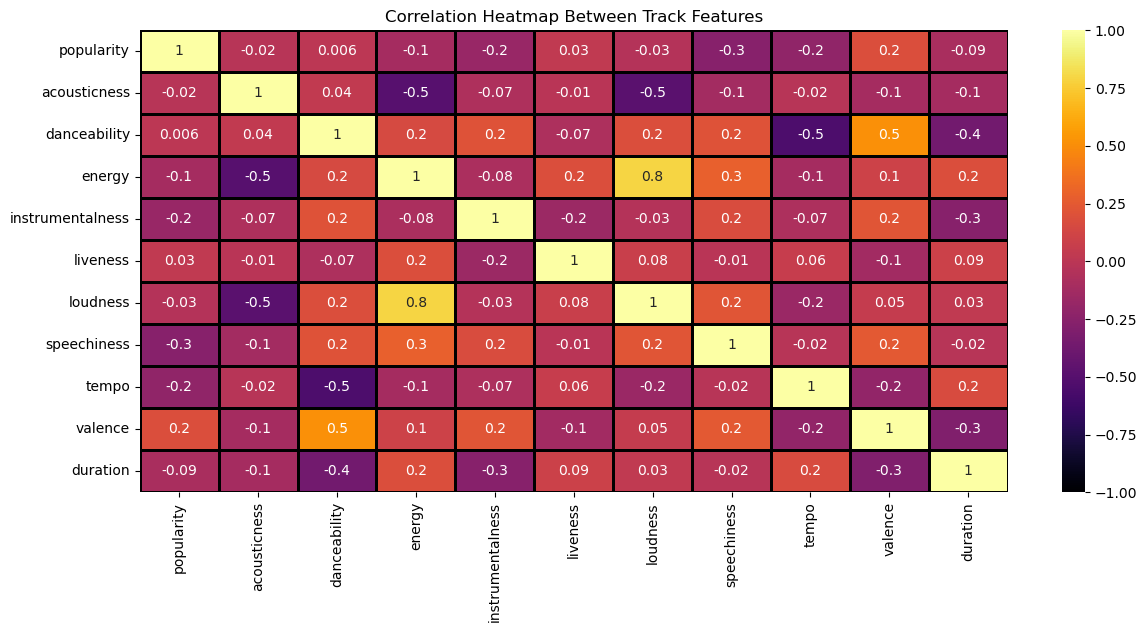

In [52]:
# Visualizing the correlation between track features

corr_df=df_albums.drop(["track_number", "key", "mode", "album_popularity"],axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation Heatmap Between Track Features")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

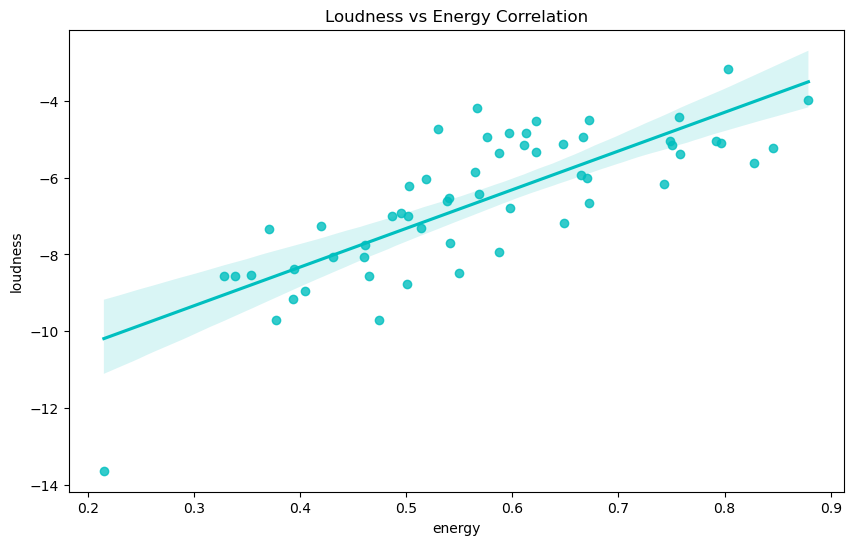

In [37]:
# Regression Plot between loudness and energy

plt.figure(figsize=(10,6))
sns.regplot(data = df_albums, y = "loudness", x = "energy", color = "c").set(title = "Loudness vs Energy Correlation")

[Text(0.5, 1.0, 'Acousticness vs Energy Correlation')]

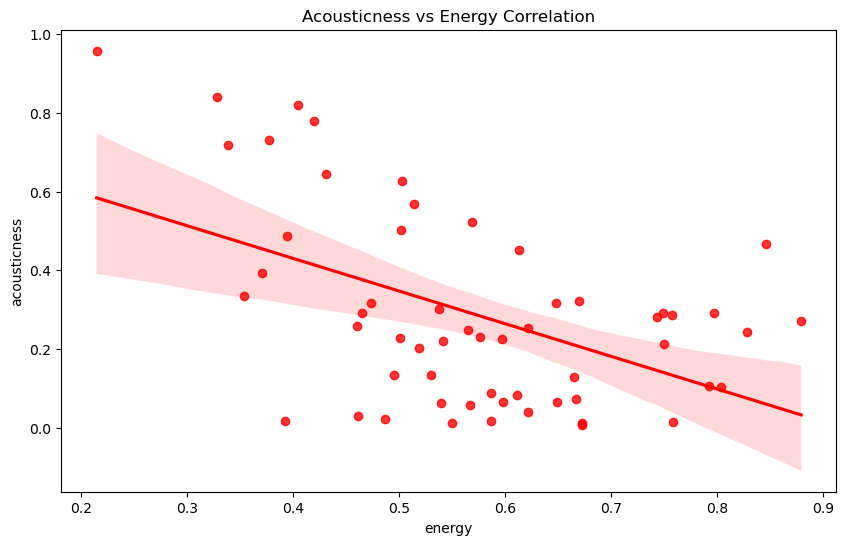

In [38]:
plt.figure(figsize=(10,6))
sns.regplot(data = df_albums, y = "acousticness", x = "energy", color = "r").set(title = "Acousticness vs Energy Correlation")

In [90]:
# Most popular albums

top_albums = df_albums.groupby("album").max().sort_values(by = "album_popularity", ascending = False)["album_popularity"][:5]
top_albums

album
The Human Condition              65
Glory Sound Prep                 60
The Definition                   57
The Separation                   55
Translations Through Speakers    52
Name: album_popularity, dtype: int64

So, Jon Bellion's most popular album is "The Human Condition".

In [68]:
df_albums.set_index("release_date", inplace = True)
df_albums.index = pd.to_datetime(df_albums.index)
df_albums.head()

,album,track_number,id,name,uri,album_popularity,image_url,duration_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
release_date,,,,,,,,,,,,,,,,,,,,
2018-11-09,Glory Sound Prep,1,1EAZ0APxPiVuzDb7R5TfVI,Conversations with my Wife,spotify:track:1EAZ0APxPiVuzDb7R5TfVI,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,206210,54,0.0222,0.496,0.487,0.000018,6,0.638,-7.003,1,0.0301,138.187,0.321
2018-11-09,Glory Sound Prep,2,1eftOUoeMO1JkSQQmS6jXF,JT,spotify:track:1eftOUoeMO1JkSQQmS6jXF,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,268466,50,0.0168,0.518,0.587,0.000001,0,0.206,-7.937,1,0.1200,98.367,0.631
2018-11-09,Glory Sound Prep,3,2X1Tygc4uVunRgzNkFb1mG,"Let's Begin (feat. Roc Marciano, RZA, B.Keyz &...",spotify:track:2X1Tygc4uVunRgzNkFb1mG,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,340522,44,0.2900,0.647,0.749,0.000001,4,0.126,-5.056,0,0.4200,91.902,0.585
2018-11-09,Glory Sound Prep,4,7cK7hDrE7vAesPf8xd5zmb,Stupid Deep,spotify:track:7cK7hDrE7vAesPf8xd5zmb,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,178176,59,0.7320,0.362,0.377,0.000631,2,0.127,-9.713,1,0.0339,137.891,0.294
2018-11-09,Glory Sound Prep,5,359Q4gGdrQIFhRzs7J8gZu,The Internet,spotify:track:359Q4gGdrQIFhRzs7J8gZu,60,https://i.scdn.co/image/ab67616d0000b273bc2009...,189492,49,0.1060,0.767,0.792,0.000010,5,0.145,-5.053,0,0.2250,119.168,0.699


In [69]:
df_albums['dates'] = df_albums.index.get_level_values('release_date')
df_albums.dates = pd.to_datetime(df_albums.dates)
years = df_albums.dates.dt.year

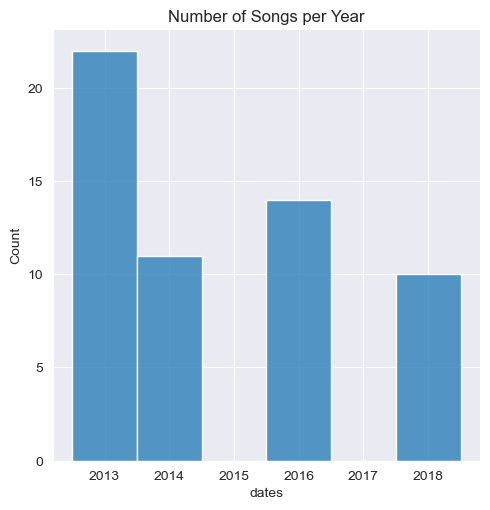

In [88]:
sns.displot(years, discrete = True, aspect = 1, height = 5, kind ="hist").set(title= "Number of Songs per Year")

As we can see here, the year with the most number of songs is 2013, given that Jon Bellion released two albums in 2013, "Translations Through Speakers" and "The Separation", both having 10 and 12 songs respectively.

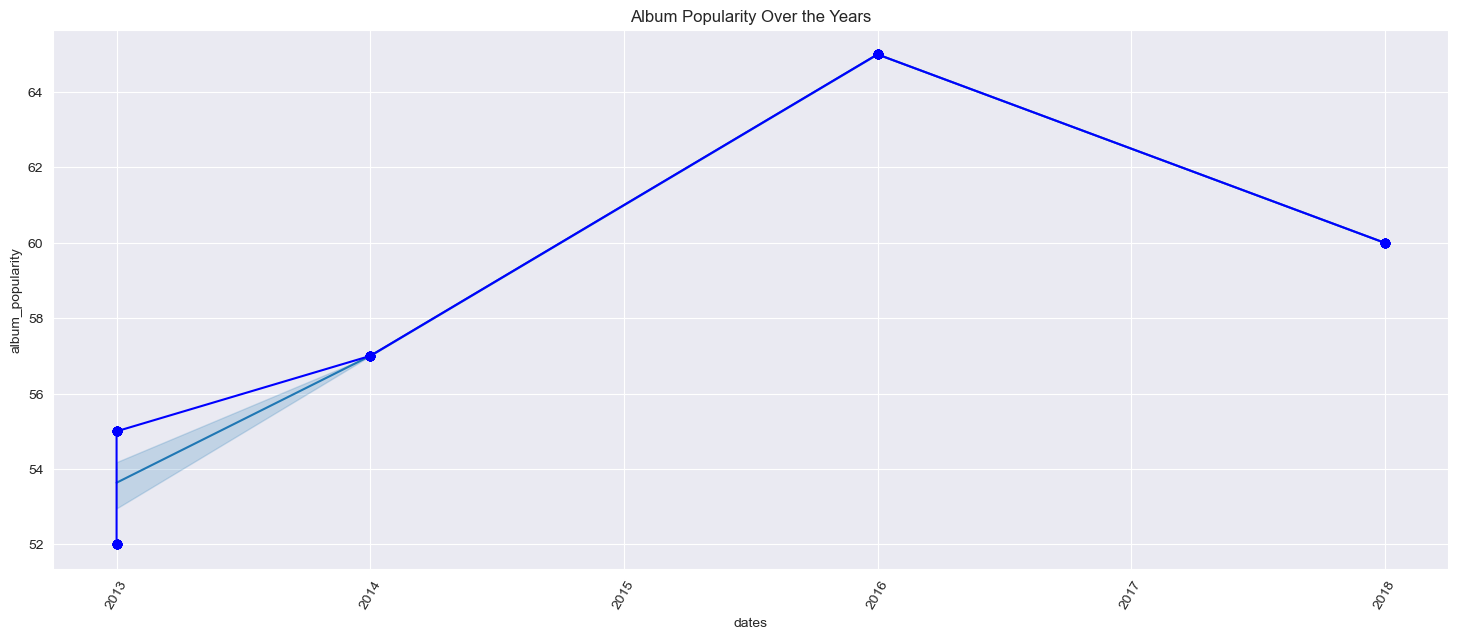

In [87]:
popularity = df_albums.album_popularity
sns.set_style(style = "darkgrid")
figdims = (8, 4)
fig, ax = plt.subplots(figsize = fig_dims)
fig = sns.lineplot(x = years, y = popularity).set(title= "Album Popularity Over the Years")
plt.xticks(rotation = 60)
plt.plot(years, popularity, 'o-b')

Popularity of Jon Bellion's albums hit a peak in 2016, with "The Human Condition" attaining a popularity rate of 65.

 Now to find out the tracks with the most energy, loudness, danceability and instrumentalness.

In [89]:
# Top 5 energetic tracks

top_energetic_tracks = df_albums.groupby("name").max().sort_values(by = "energy", ascending = False)["energy"][:5]
top_energetic_tracks

name
When The Lions Come          0.879
Carry Your Throne            0.846
Adult Swim (feat. Tuamie)    0.828
Guillotine                   0.803
Waves Of Loneliness          0.797
Name: energy, dtype: float64

In [41]:
# Top 5 loudest tracks

top_loudest_tracks = df_albums.groupby("name").max().sort_values(by = "loudness", ascending = False)["loudness"][:5]
top_loudest_tracks

name
Guillotine               -3.170
When The Lions Come      -3.965
All Time Low             -4.188
Halloween                -4.430
New York Soul - Pt. ii   -4.491
Name: loudness, dtype: float64

In [43]:
# Top 5 tracks with the highest danceability feature

top_danceable_tracks = df_albums.groupby("name").max().sort_values(by = "danceability", ascending = False)["danceability"][:5]
top_danceable_tracks

name
Kingdom Come                0.911
A Dedicated Instrumental    0.864
Ooh                         0.827
Halloween                   0.807
While You Count Sheep       0.799
Name: danceability, dtype: float64

In [44]:
# Top 5 tracks with the highest instrumentalness

top_instrumental_tracks = df_albums.groupby("name").max().sort_values(by = "instrumentalness", ascending = False)["instrumentalness"][:5]
top_instrumental_tracks

name
A Dedicated Instrumental            0.009470
He Is The Same                      0.001770
Stupid Deep                         0.000631
Mah's Joint (feat. Quincy Jones)    0.000489
Carry Your Throne                   0.000406
Name: instrumentalness, dtype: float64